In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

In [3]:
from sklearn import datasets

In [4]:
moons =datasets.make_moons(n_samples=1500,noise=.05)

In [5]:
x,y = moons

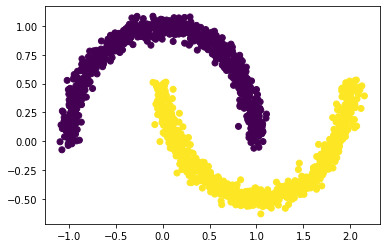

In [7]:
plt.scatter(x[:,0],x[:,1],c=y)

In [8]:
from sklearn.datasets._samples_generator import make_blobs
from sklearn.preprocessing import MinMaxScaler

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [13]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)

scaler = MinMaxScaler()
scaler.fit(x_test)
x_test_scaled = scaler.transform(x_test)

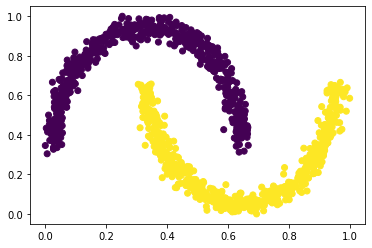

In [15]:
plt.scatter(x_train_scaled[:,0],x_train_scaled[:,1],c=y_train)

In [37]:
model = Sequential()
model.add(Dense(1,input_dim=2,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam') 
model.fit(x_train,y_train,epochs=500,verbose=2)

Epoch 1/500
36/36 - 0s - loss: 1.4367 - 371ms/epoch - 10ms/step
Epoch 2/500
36/36 - 0s - loss: 1.4090 - 90ms/epoch - 2ms/step
Epoch 3/500
36/36 - 0s - loss: 1.3822 - 86ms/epoch - 2ms/step
Epoch 4/500
36/36 - 0s - loss: 1.3557 - 85ms/epoch - 2ms/step
Epoch 5/500
36/36 - 0s - loss: 1.3294 - 84ms/epoch - 2ms/step
Epoch 6/500
36/36 - 0s - loss: 1.3035 - 96ms/epoch - 3ms/step
Epoch 7/500
36/36 - 0s - loss: 1.2782 - 96ms/epoch - 3ms/step
Epoch 8/500
36/36 - 0s - loss: 1.2533 - 81ms/epoch - 2ms/step
Epoch 9/500
36/36 - 0s - loss: 1.2292 - 89ms/epoch - 2ms/step
Epoch 10/500
36/36 - 0s - loss: 1.2053 - 78ms/epoch - 2ms/step
Epoch 11/500
36/36 - 0s - loss: 1.1818 - 84ms/epoch - 2ms/step
Epoch 12/500
36/36 - 0s - loss: 1.1585 - 77ms/epoch - 2ms/step
Epoch 13/500
36/36 - 0s - loss: 1.1356 - 85ms/epoch - 2ms/step
Epoch 14/500
36/36 - 0s - loss: 1.1128 - 89ms/epoch - 2ms/step
Epoch 15/500
36/36 - 0s - loss: 1.0910 - 103ms/epoch - 3ms/step
Epoch 16/500
36/36 - 0s - loss: 1.0695 - 110ms/epoch - 3ms/st

In [38]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [39]:
y_predict = model.predict(x_test_scaled)

In [40]:
from sklearn.metrics import classification_report,confusion_matrix

cm = confusion_matrix(y_test,y_predict.round())

<AxesSubplot:>

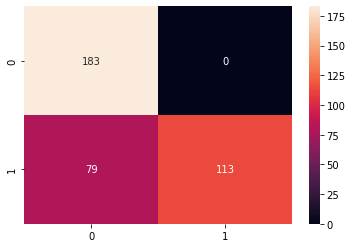

In [41]:
sns.heatmap(cm,annot=True,fmt="d")

In [42]:
print(classification_report(y_test,y_predict.round()))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82       183
           1       1.00      0.59      0.74       192

    accuracy                           0.79       375
   macro avg       0.85      0.79      0.78       375
weighted avg       0.85      0.79      0.78       375



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


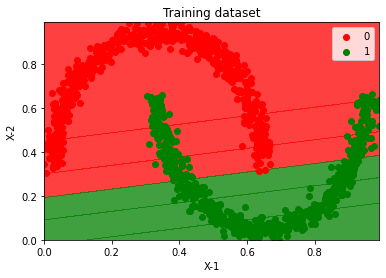

In [43]:
from matplotlib.colors import ListedColormap
X_set, y_set = x_train_scaled, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() , stop = X_set[:, 0].max(), step = 0.01),
                     np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Training dataset')
plt.xlabel('X-1')
plt.ylabel('X-2')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


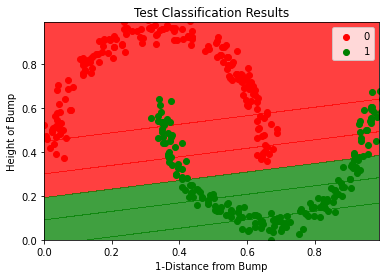

In [44]:
from matplotlib.colors import ListedColormap
X_set, y_set = x_test_scaled, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() , stop = X_set[:, 0].max(), step = 0.01),
                     np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Test Classification Results')
plt.xlabel('1-Distance from Bump')
plt.ylabel('Height of Bump')
plt.legend()
plt.show()

### Adding more neurons as we didn't get the desired results

In [46]:
# define and fit the final model
model = Sequential()
model.add(Dense(20, input_dim=2, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(x_train_scaled, y_train, epochs=500, verbose=2) 

Epoch 1/500
36/36 - 0s - loss: 0.6602 - 476ms/epoch - 13ms/step
Epoch 2/500
36/36 - 0s - loss: 0.5616 - 151ms/epoch - 4ms/step
Epoch 3/500
36/36 - 0s - loss: 0.3874 - 141ms/epoch - 4ms/step
Epoch 4/500
36/36 - 0s - loss: 0.2964 - 136ms/epoch - 4ms/step
Epoch 5/500
36/36 - 0s - loss: 0.2672 - 128ms/epoch - 4ms/step
Epoch 6/500
36/36 - 0s - loss: 0.2639 - 127ms/epoch - 4ms/step
Epoch 7/500
36/36 - 0s - loss: 0.2571 - 135ms/epoch - 4ms/step
Epoch 8/500
36/36 - 0s - loss: 0.2526 - 134ms/epoch - 4ms/step
Epoch 9/500
36/36 - 0s - loss: 0.2538 - 125ms/epoch - 3ms/step
Epoch 10/500
36/36 - 0s - loss: 0.2466 - 126ms/epoch - 3ms/step
Epoch 11/500
36/36 - 0s - loss: 0.2515 - 126ms/epoch - 3ms/step
Epoch 12/500
36/36 - 0s - loss: 0.2540 - 123ms/epoch - 3ms/step
Epoch 13/500
36/36 - 0s - loss: 0.2507 - 125ms/epoch - 3ms/step
Epoch 14/500
36/36 - 0s - loss: 0.2437 - 126ms/epoch - 3ms/step
Epoch 15/500
36/36 - 0s - loss: 0.2457 - 206ms/epoch - 6ms/step
Epoch 16/500
36/36 - 0s - loss: 0.2442 - 134ms/e

In [47]:
y_predict = model.predict(x_test_scaled)

In [48]:
from sklearn.metrics import classification_report,confusion_matrix

cm = confusion_matrix(y_test,y_predict.round())

<AxesSubplot:>

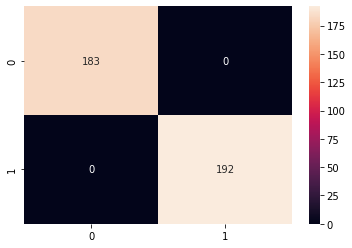

In [49]:
sns.heatmap(cm,annot=True,fmt="d")

In [50]:
print(classification_report(y_test,y_predict.round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       183
           1       1.00      1.00      1.00       192

    accuracy                           1.00       375
   macro avg       1.00      1.00      1.00       375
weighted avg       1.00      1.00      1.00       375



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


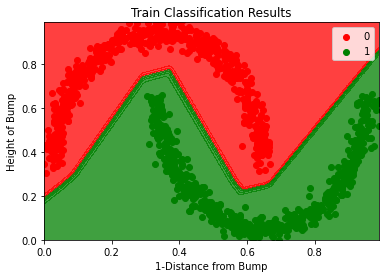

In [51]:
from matplotlib.colors import ListedColormap
X_set, y_set = x_train_scaled,y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() , stop = X_set[:, 0].max(), step = 0.01),
                     np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Train Classification Results')
plt.xlabel('1-Distance from Bump')
plt.ylabel('Height of Bump')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


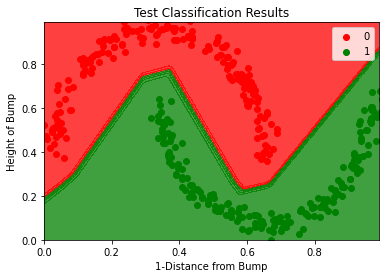

In [52]:
from matplotlib.colors import ListedColormap
X_set, y_set = x_test_scaled, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() , stop = X_set[:, 0].max(), step = 0.01),
                     np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Test Classification Results')
plt.xlabel('1-Distance from Bump')
plt.ylabel('Height of Bump')
plt.legend()
plt.show()